## Visa Status Detection Using Logistic Regression

__Problem Statement__

    Here data contains the list of visa approved candiates, using this data construct a logistic regresion model to find for new candidates and ensure that it has good range of accuracy and remaining metrics

Stepts for Construcion model

1. Data collection and basic info of the data
2. EDA 
3. Feature Engineering
4. Train-Test splitting 
5. Training the model for logistic regression
6. Predicting the test values
7. Ensuring the metrics

In [1]:
#loading the Libraries
import pandas as pd
import numpy as np

#visualization libraies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Q-Q plots
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
visa_df = pd.read_csv(r'C:\Users\HP\Documents\EDA\EDA-BySunny\EDABySunny\Dataset\data5\Visadataset.csv')
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Top 5 records 

In [4]:
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


###  Botton 5  records

In [5]:
visa_df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
visa_df.shape

(25480, 12)

__Report:__

1. visa dataset has 25480 rows, 12 columns
2. case_id is just serial number doesn't contribute to visa data so we can drop the case_id
3. case_status is the **Target** feature
4. no_of_employees,yr_of_estab and prevailing_wage are only numerical features remaining are all objects


### Dropping the feature 

In [9]:
df = visa_df.drop(['case_id'],axis=1)
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


### Fining the Missing values

In [10]:
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

__Clear observation we can say there is zero missing values__

### Finding the Duplicated values 

In [11]:
df[df.duplicated()].sum()

continent                0.0
education_of_employee    0.0
has_job_experience       0.0
requires_job_training    0.0
no_of_employees          0.0
yr_of_estab              0.0
region_of_employment     0.0
prevailing_wage          0.0
unit_of_wage             0.0
full_time_position       0.0
case_status              0.0
dtype: float64

__No Duplicated values in the given dataset__

In [12]:
# unique values 
df.nunique()

continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

### Analysis of Features

In [13]:
#seperation the features
num_col = [x for x in df.columns if df[x].dtype !='O']
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [14]:
cat_col = [y for y in df.columns if df[y].dtype == 'O']
cat_col

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

### Univariate analysis

<AxesSubplot:xlabel='case_status', ylabel='count'>

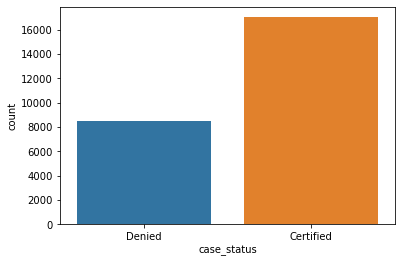

In [15]:
# target feture using count plot 
sns.countplot(data=df,x='case_status')

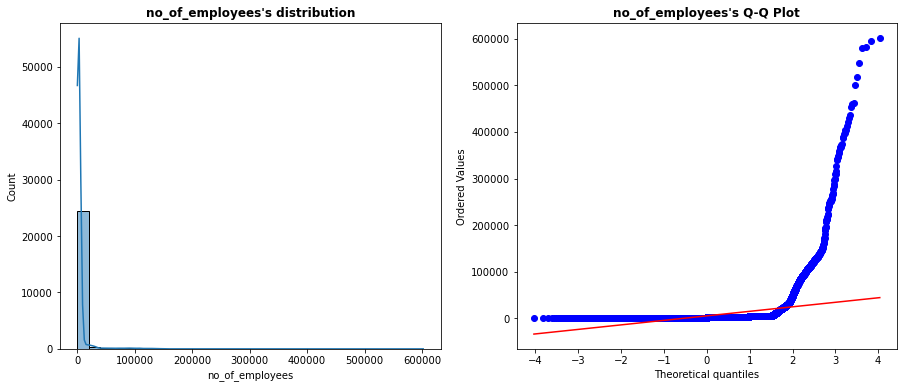

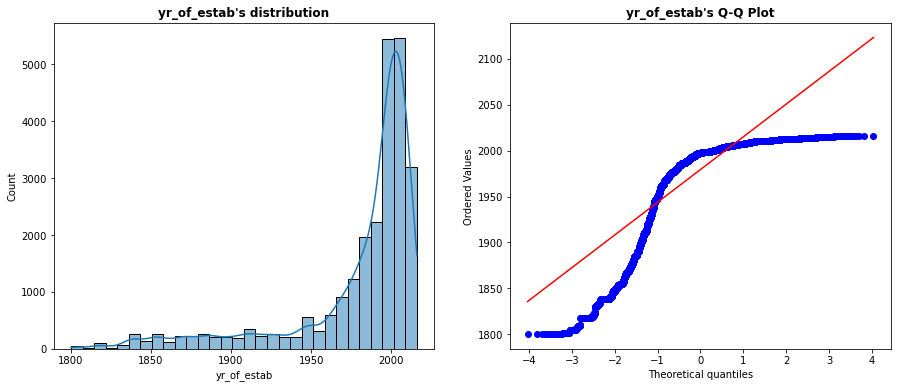

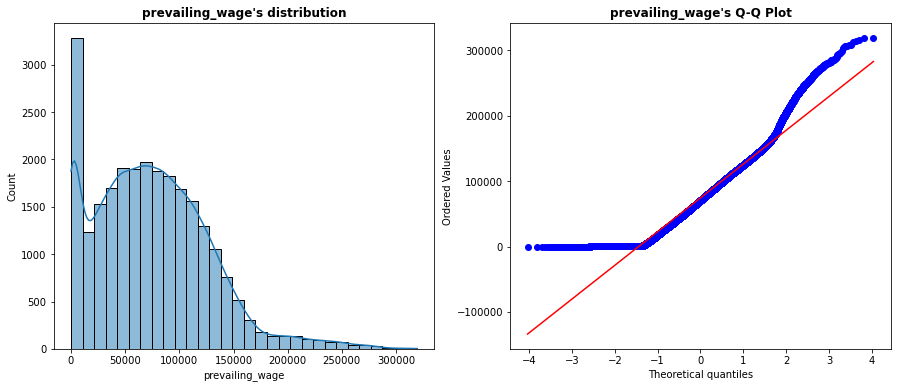

In [16]:
for i in num_col:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df,x=i,kde=True,bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    stats.probplot(df[i],dist='norm',plot=plt)
    plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show()

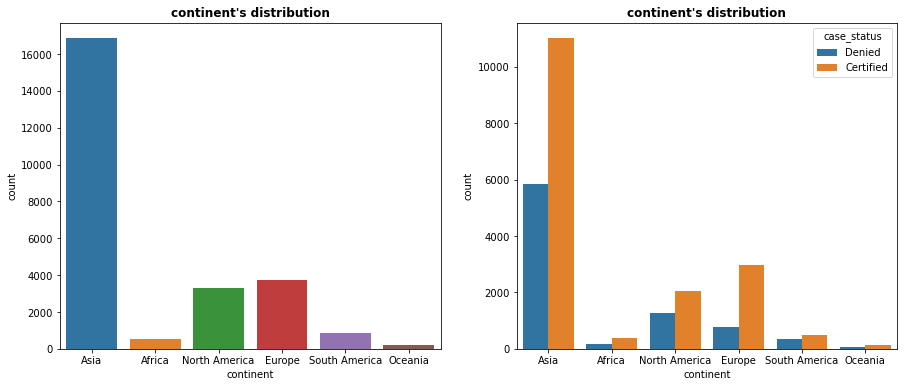

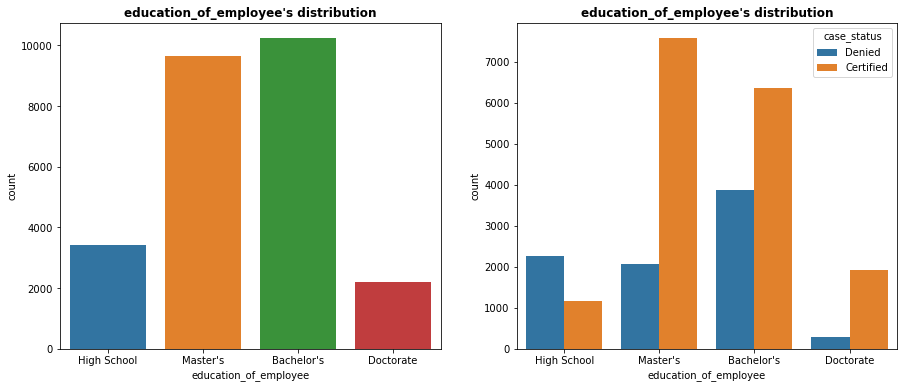

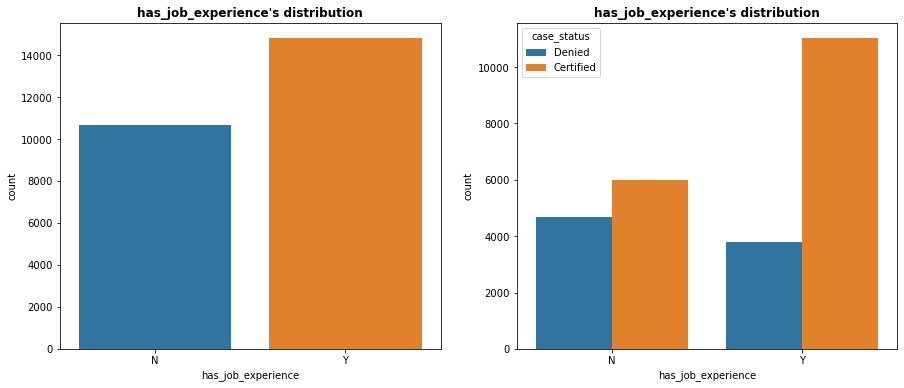

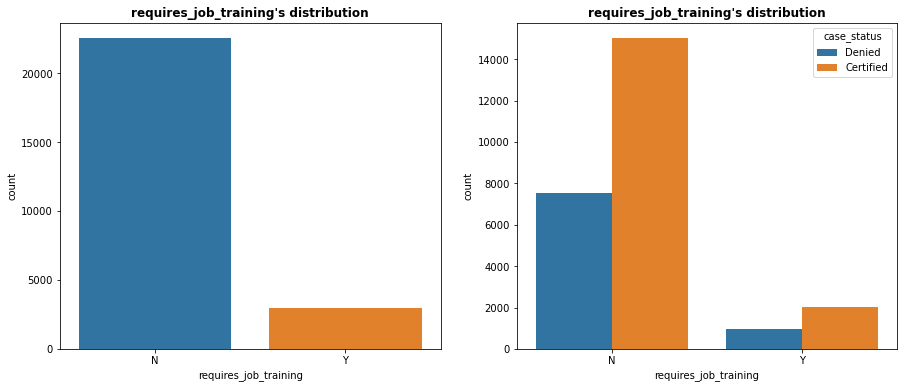

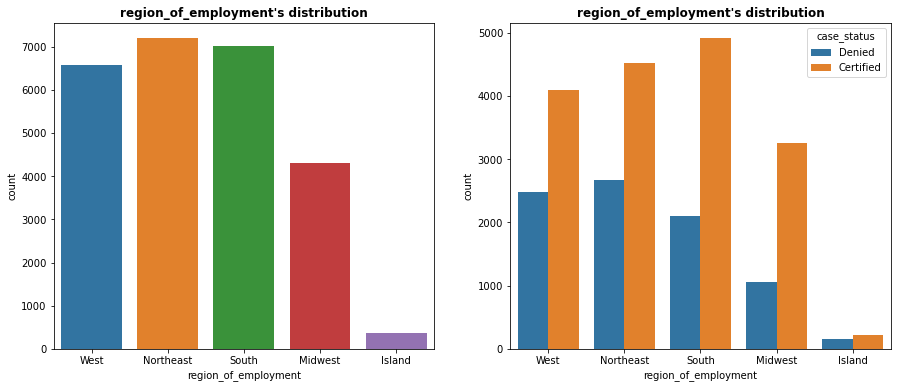

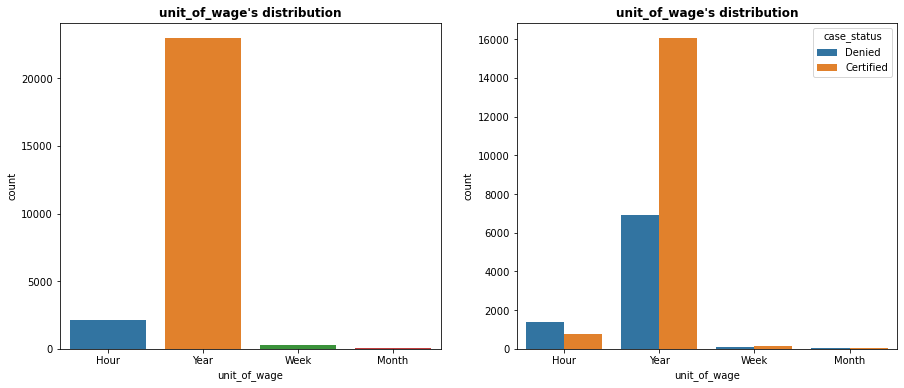

In [17]:
for i in cat_col[:-2]:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.countplot(data=df,x=i)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.subplot(122)
    sns.countplot(data=df,x=i, hue='case_status')
    plt.title("{}'s distribution".format(i),fontweight="bold")
    plt.show()

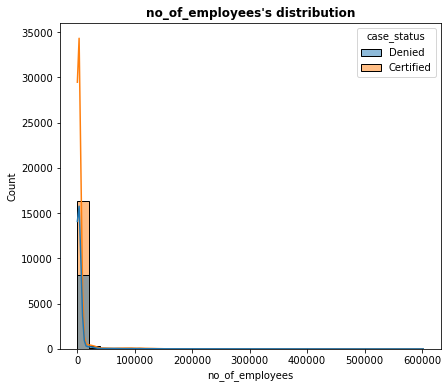

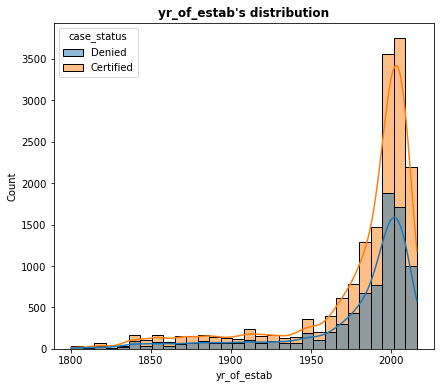

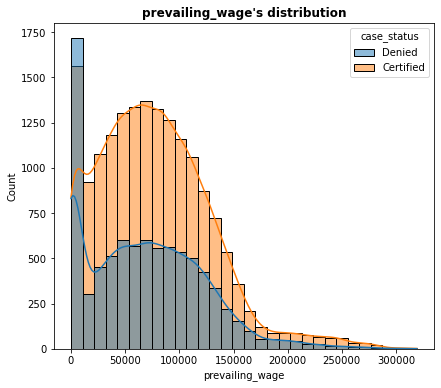

In [18]:
# plotting figue for prevailing_wage and case_status
for i in num_col:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=df, x=i, kde=True, bins=30, color='blue', hue='case_status')
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
#     plt.subplot(122)
#     stats.probplot(df[i],dist='norm',plot=plt)
#     plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
    plt.show()
#sns.histplot(data=df, x='prevailing_wage', kde=True, bins=30, color='blue', hue='case_status')

In [19]:
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [20]:
cat_col

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

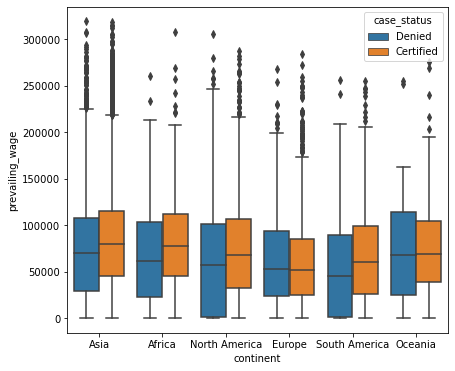

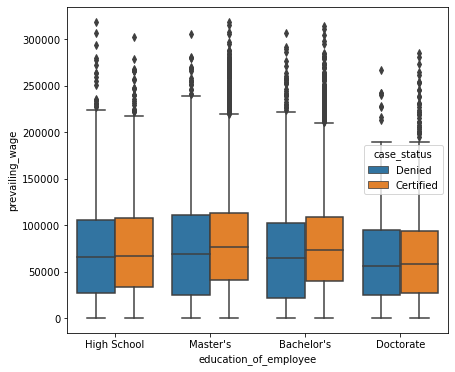

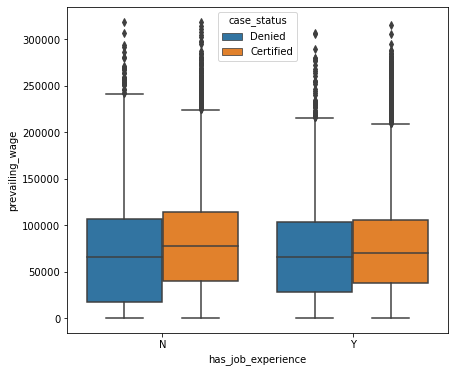

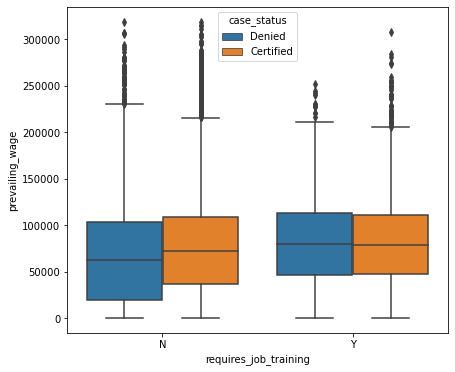

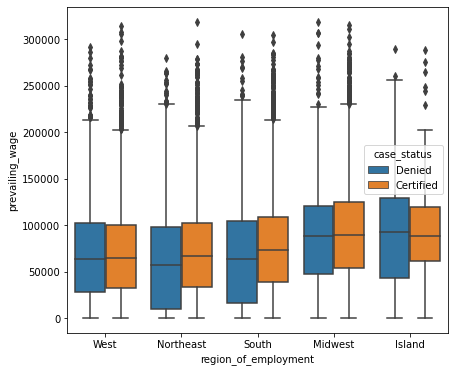

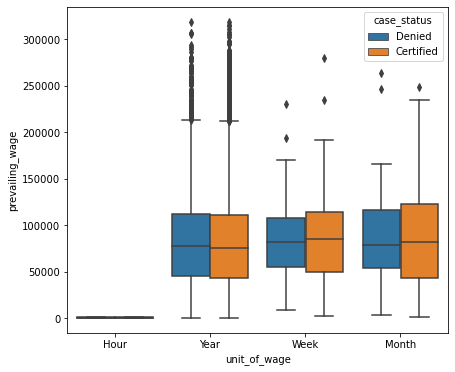

In [21]:
for i in cat_col[:-2]:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.boxplot(x=i,y='prevailing_wage',data=df,hue='case_status')
    plt.show()

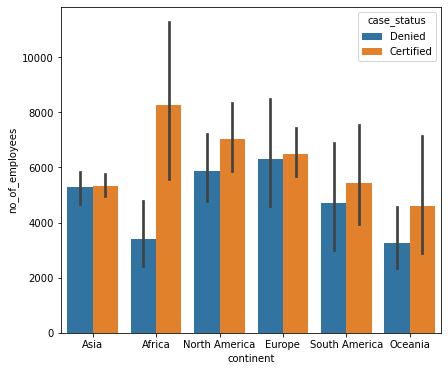

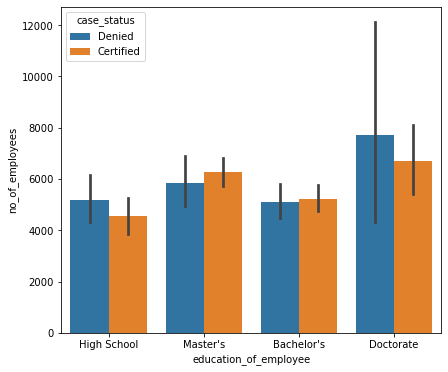

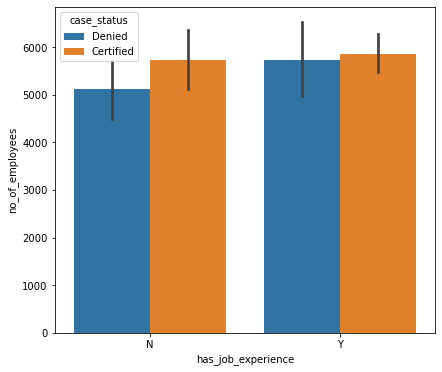

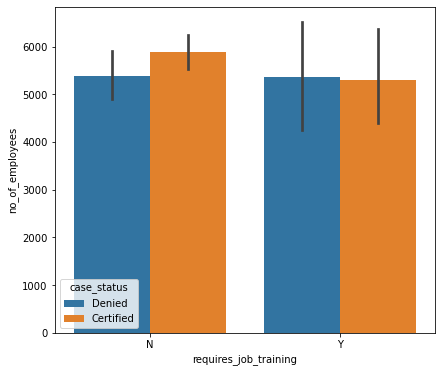

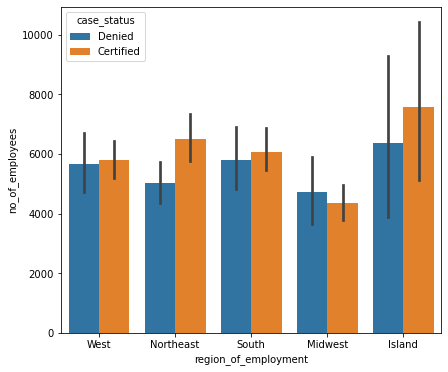

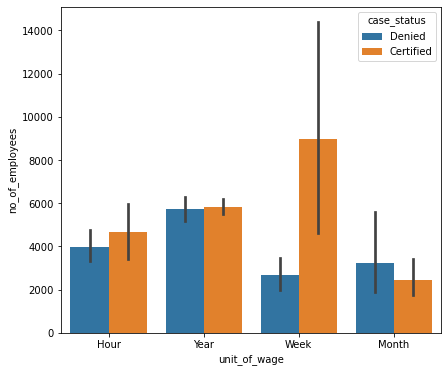

In [22]:
for i in cat_col[:-2]:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.barplot(x=i,y='no_of_employees',data=df,hue='case_status')
    plt.show()
#sns.barplot(x='case_status',y='no_of_employees',data=df,hue='')

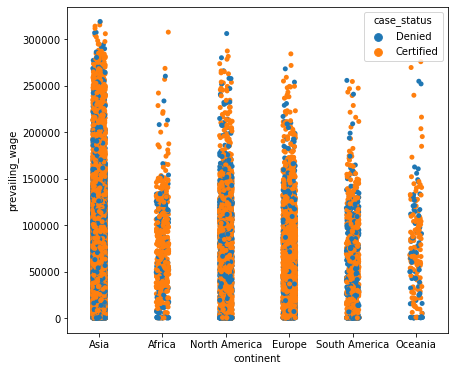

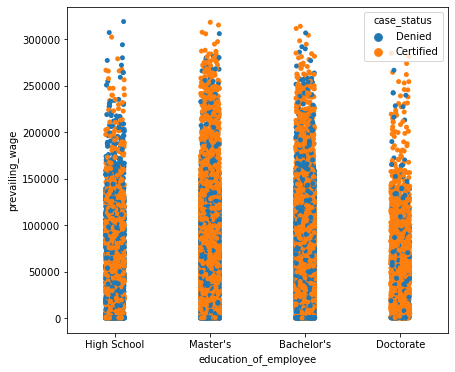

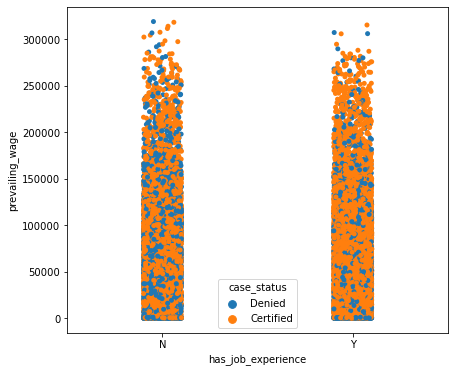

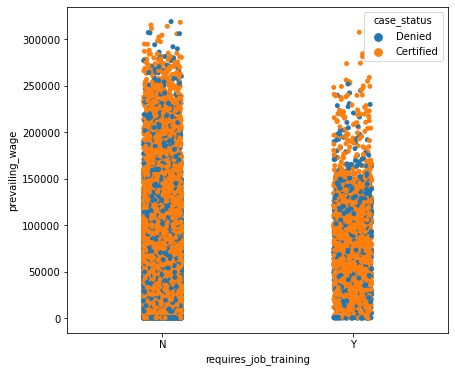

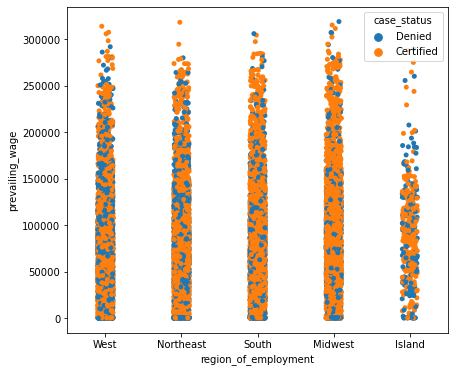

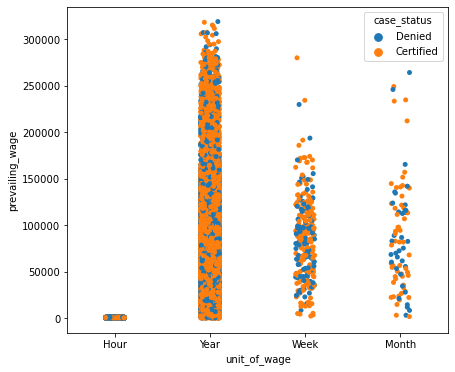

In [23]:
for i in cat_col[:-2]:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.stripplot(x=i,y='prevailing_wage',data=df,hue='case_status')
    plt.show()

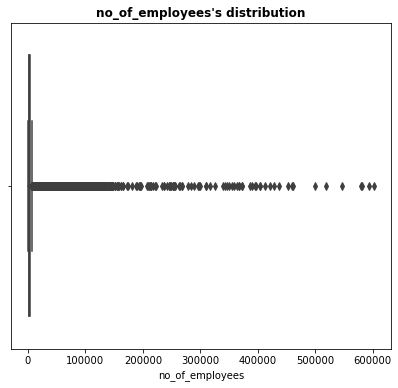

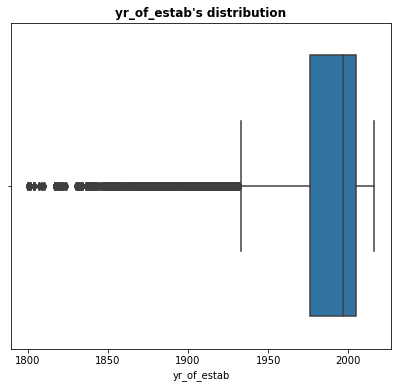

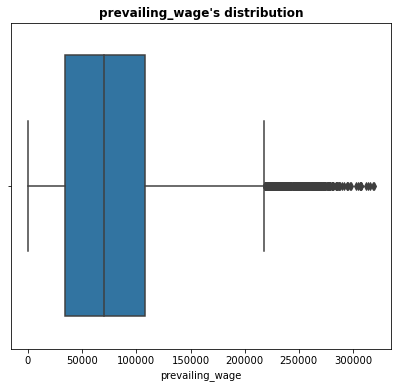

In [25]:
for i in num_col:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.boxplot(data=df,x=i)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    

In [26]:
cn_g = df.groupby('continent')
cn_g['no_of_employees'].sum()

continent
Africa            3811891
Asia             89605599
Europe           24122041
North America    21708853
Oceania            789239
South America     4358638
Name: no_of_employees, dtype: int64

In [31]:
#sns.countplot(data=cn_g['no_of_employees'].sum(),x='full_time_position')
cn_g['prevailing_wage'].sum()

continent
Africa           4.266168e+07
Asia             1.341175e+09
Europe           2.233338e+08
North America    2.240743e+08
Oceania          1.459090e+07
South America    5.129856e+07
Name: prevailing_wage, dtype: float64

In [32]:
cat_col

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [41]:
cn_g['case_status'].count()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
Name: case_status, dtype: int64

In [34]:
cn_g.first()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
continent,,,,,,,,,,
Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified
North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
Oceania,Doctorate,Y,N,2871,2009,South,56606.5400,Month,Y,Certified
South America,Bachelor's,N,N,1415,1913,Northeast,53114.0200,Year,Y,Denied
